In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

dataset link: https://www.kaggle.com/knightbearr/sales-product-data

In [2]:
# importing all the files

lst= [file for file in os.listdir(r'C:\Users\light\Downloads\archive\sales data')]
all_months_data= pd.DataFrame()

for file in lst:
    df= pd.read_csv('C:\\Users\\light\\Downloads\\archive\\sales data\\'+file)
    
    all_months_data= pd.concat([all_months_data, df])

In [3]:
df_amazon= all_months_data.copy()

In [4]:
df_amazon.shape

(186850, 6)

In [5]:
# dropping empty rows

df_amazon_1= df_amazon.dropna(axis= 0, how= 'all').reset_index(drop= True)
df_amazon_1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [6]:
df_amazon_1.shape

(186305, 6)

In [7]:
df_amazon_1.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [8]:
df_amazon_1.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [9]:
df_amazon_1['Quantity Ordered'].unique()

array(['2', '1', '3', '5', 'Quantity Ordered', '4', '7', '6', '8', '9'],
      dtype=object)

In [10]:
# removing this unwanted data:

df_amazon_2= df_amazon_1[~df_amazon_1['Quantity Ordered'].isin(['Quantity Ordered'])].reset_index(drop= True)
df_amazon_2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [11]:
# changing the datatypes for some columns:

df_amazon_2['Quantity Ordered']= df_amazon_2['Quantity Ordered'].astype(int)
df_amazon_2['Price Each']= df_amazon_2['Price Each'].astype(float)
df_amazon_2['Order Date']= pd.to_datetime(df_amazon_2['Order Date'])

In [12]:
df_amazon_2.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int32
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [13]:
df_amazon_2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


### adding some importent columns:

In [14]:
df_amazon_2['Purchase Address']

0                    917 1st St, Dallas, TX 75001
1               682 Chestnut St, Boston, MA 02215
2            669 Spruce St, Los Angeles, CA 90001
3            669 Spruce St, Los Angeles, CA 90001
4               333 8th St, Los Angeles, CA 90001
                           ...                   
185945     840 Highland St, Los Angeles, CA 90001
185946    216 Dogwood St, San Francisco, CA 94016
185947       220 12th St, San Francisco, CA 94016
185948     511 Forest St, San Francisco, CA 94016
185949     250 Meadow St, San Francisco, CA 94016
Name: Purchase Address, Length: 185950, dtype: object

In [15]:
# adding city columns

g= (i[-8:-6] for i in df_amazon_2['Purchase Address'])
df_amazon_2['City']= df_amazon_2['Purchase Address'].apply(lambda x : f'{x.split(",")[1]} ({next(g)})')    

In [16]:
df_amazon_2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Boston (MA)
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Los Angeles (CA)


In [17]:
# adding month, day, hour, year columns

df_amazon_2.insert(loc= 5, column= 'Day', value= df_amazon_2['Order Date'].dt.day)
df_amazon_2.insert(loc= 6, column= 'Month', value= df_amazon_2['Order Date'].dt.month)
df_amazon_2.insert(loc= 7, column= 'Hour', value= df_amazon_2['Order Date'].dt.hour)

In [18]:
df_amazon_2.insert(loc= 8, column= 'Year', value= df_amazon_2['Order Date'].dt.year)

In [19]:
df_amazon_2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Day,Month,Hour,Year,Purchase Address,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,19,4,8,2019,"917 1st St, Dallas, TX 75001",Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,7,4,22,2019,"682 Chestnut St, Boston, MA 02215",Boston (MA)
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,12,4,14,2019,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,12,4,14,2019,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,30,4,9,2019,"333 8th St, Los Angeles, CA 90001",Los Angeles (CA)


### Finding some imp results:

##### What was the best Year for sales? How much was earned that Year?

In [20]:
df_amazon_2.groupby('Year')['Price Each'].sum()

# the time for this data is available, 2019 is the best year, but we can not say anything for 2020, because this dataset does not contain all the data related to 2020.

Year
2019    34280627.28
2020        8503.40
Name: Price Each, dtype: float64

#### What was the best month for sales? How much was earned that month?

In [21]:
# checking this only for 2019

best_mon_2019= df_amazon_2[df_amazon_2['Year'].isin([2019])]

best_mon_2019_TEarned= best_mon_2019.groupby('Month')['Price Each'].sum().sort_values(ascending= False)
best_mon_2019_TEarned

# December is the best month for sale, may be because of Christmas. And, the total is $ 4588415.41.

Month
12    4588415.41
10    3715554.83
4     3367671.02
11    3180600.68
5     3135125.13
3     2791207.83
7     2632539.56
6     2562025.61
8     2230345.42
2     2188884.72
9     2084992.09
1     1803264.98
Name: Price Each, dtype: float64

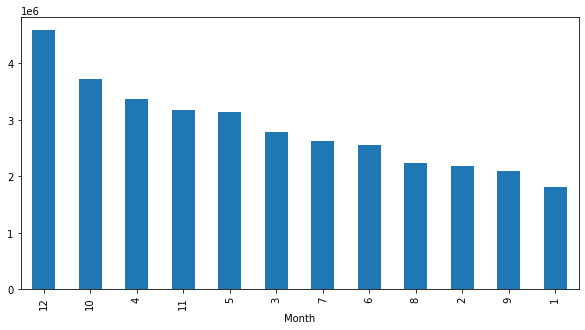

In [22]:
# visualising this result to compare

best_mon_2019_TEarned.plot(kind= 'bar', figsize= (10, 5))
plt.show()

# and january is the worst month for sale

#### What City had the highest number of sales?

In [23]:
df_amazon_2.groupby('City')['Price Each'].sum()

City
 Atlanta (GA)          2779908.20
 Austin (TX)           1809873.61
 Boston (MA)           3637409.77
 Dallas (TX)           2752627.82
 Los Angeles (CA)      5421435.23
 New York City (NY)    4635370.83
 Portland (ME)          447189.25
 Portland (OR)         1860558.22
 San Francisco (CA)    8211461.74
 Seattle (WA)          2733296.01
Name: Price Each, dtype: float64

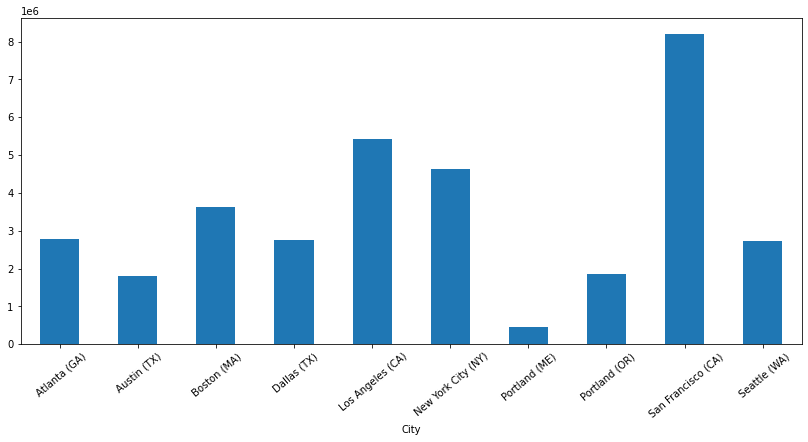

In [24]:
# visualise

df_amazon_2.groupby('City')['Price Each'].sum().plot(kind= 'bar', figsize= (14, 6))
plt.xticks(rotation= 40)
plt.show()

# so 'San Francisco (CA)' is best and 'Portland (ME)' is the worst city for sale

#### What time should we display adverstisement to maximize likelihood of customer's buying product?

In [25]:
df_amazon_2.groupby('Hour')['Price Each'].sum()

Hour
0      709296.70
1      458490.00
2      233833.64
3      144726.42
4      162058.18
5      229621.21
6      445000.11
7      740568.11
8     1185970.62
9     1628498.49
10    1932665.62
11    2288855.18
12    2299876.68
13    2139743.86
14    2072194.77
15    1931174.99
16    1892454.54
17    2116777.02
18    2207696.93
19    2398588.31
20    2268185.16
21    2030763.83
22    1599464.44
23    1172625.87
Name: Price Each, dtype: float64

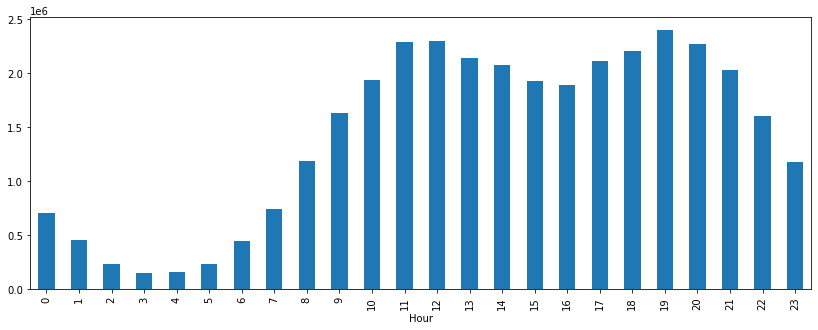

In [26]:
# visualise
df_amazon_2.groupby('Hour')['Price Each'].sum().plot(kind= 'bar', figsize= (14, 5))
plt.show()

# 7 pm is bestest
# all the hour except hour 0, 1, 2, 3, 4, 5, 6, 7, 8 and 23 are best for sale.
# so we can say that morning and late night are not good for sale.
# means from 9AM to 11PM are the best hour to show adds.

In [27]:
# checking the best sales time with month and hour

df_amazon_2.groupby(['Month', 'Hour'])['Price Each'].sum()

Month  Hour
1      0        42356.09
       1        24551.73
       2        17388.61
       3         6747.82
       4         6402.50
                 ...    
12     19      321457.18
       20      319319.76
       21      253996.83
       22      211311.26
       23      157237.42
Name: Price Each, Length: 288, dtype: float64

In [28]:
def month_data(month):
    return df_amazon_2[(df_amazon_2['Month'] == month) & (df_amazon_2['Year'] == 2019)].groupby(['Month', 'Hour'])['Price Each'].sum()

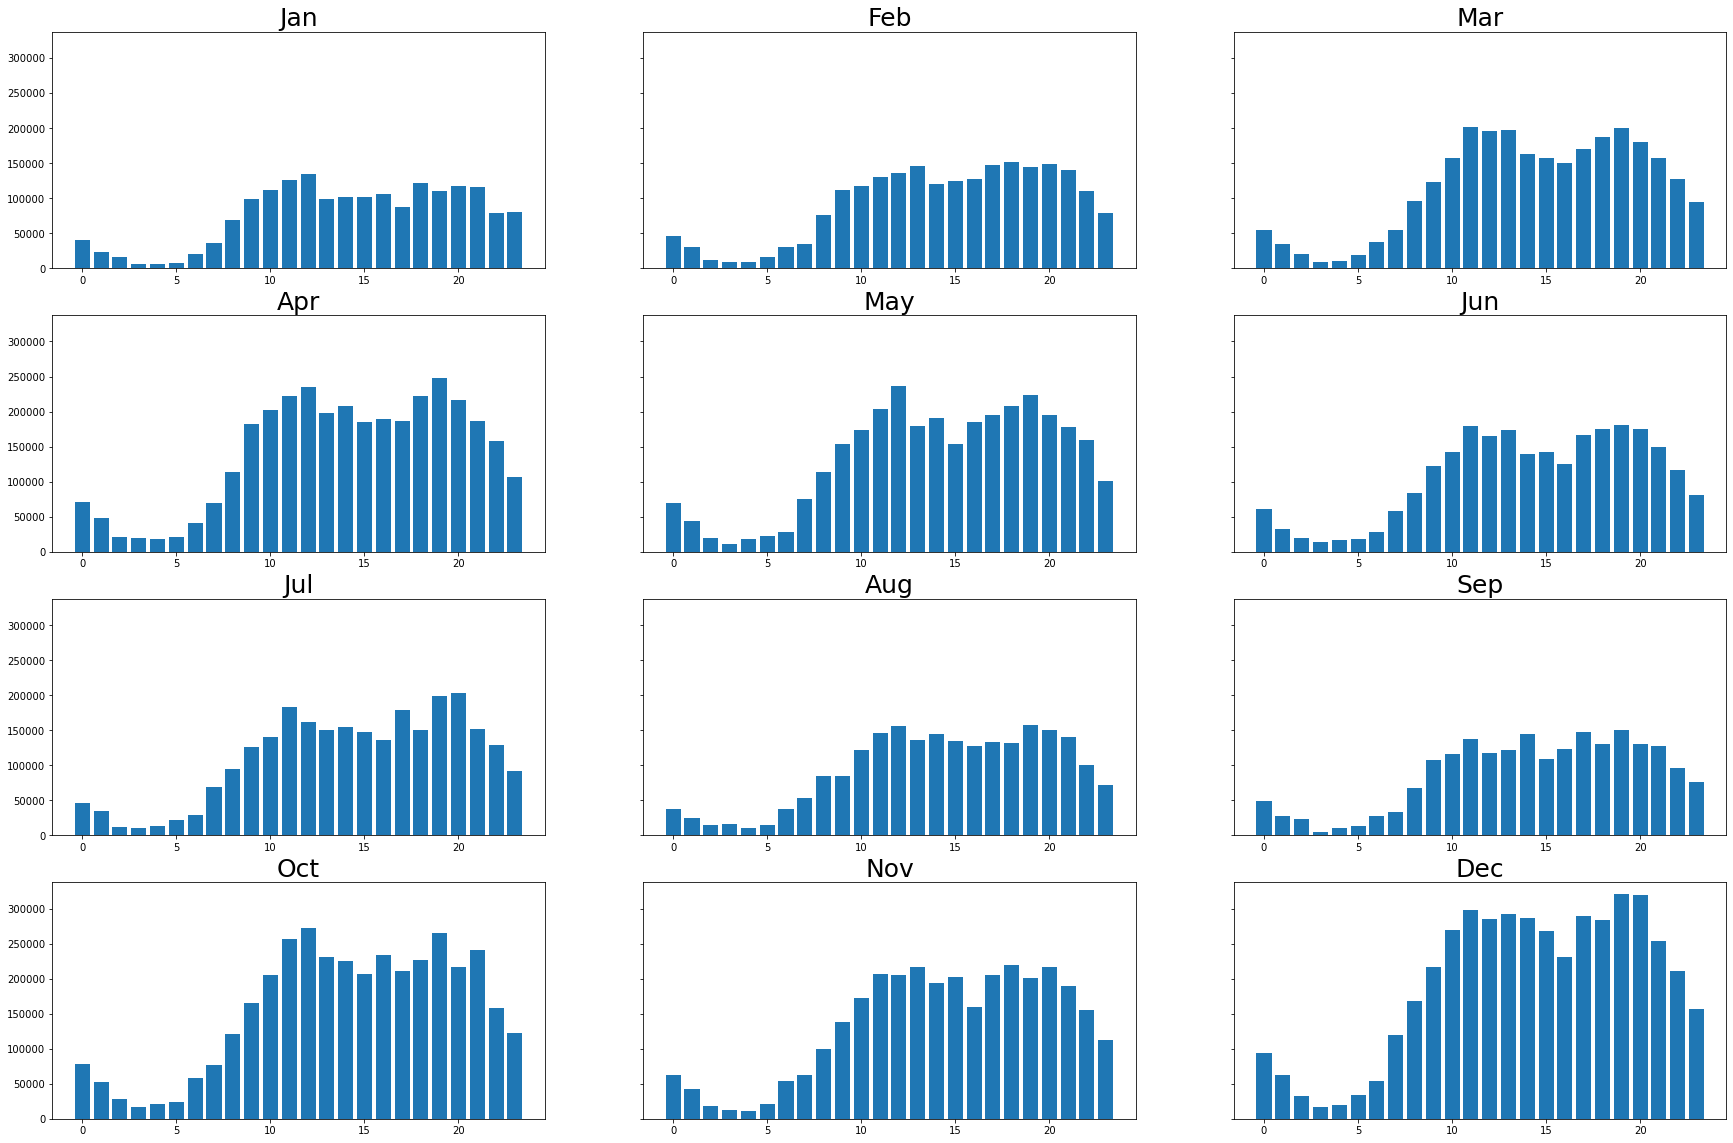

In [39]:
fig, ax= plt.subplots(4, 3, figsize= (30, 20), sharey= True)


ax[0,0].bar(x= [i[1] for i in month_data(1).index], height= list(month_data(1).values))
ax[0,0].set_title('Jan', size= 25)


ax[0,1].bar(x= [i[1] for i in month_data(2).index], height= list(month_data(2).values))
ax[0,1].set_title('Feb', size= 25)

ax[0,2].bar(x= [i[1] for i in month_data(3).index], height= list(month_data(3).values))
ax[0,2].set_title('Mar', size= 25)

ax[1,0].bar(x= [i[1] for i in month_data(4).index], height= list(month_data(4).values))
ax[1,0].set_title('Apr', size= 25)


ax[1,1].bar(x= [i[1] for i in month_data(5).index], height= list(month_data(5).values))
ax[1,1].set_title('May', size= 25)

ax[1,2].bar(x= [i[1] for i in month_data(6).index], height= list(month_data(6).values))
ax[1,2].set_title('Jun', size= 25)

ax[2,0].bar(x= [i[1] for i in month_data(7).index], height= list(month_data(7).values))
ax[2,0].set_title('Jul', size= 25)

ax[2,1].bar(x= [i[1] for i in month_data(8).index], height= list(month_data(8).values))
ax[2,1].set_title('Aug', size= 25)

ax[2,2].bar(x= [i[1] for i in month_data(9).index], height= list(month_data(9).values))
ax[2,2].set_title('Sep', size= 25)


ax[3,0].bar(x= [i[1] for i in month_data(10).index], height= list(month_data(10).values))
ax[3,0].set_title('Oct', size= 25)


ax[3,1].bar(x= [i[1] for i in month_data(11).index], height= list(month_data(11).values))
ax[3,1].set_title('Nov', size= 25)

ax[3,2].bar(x= [i[1] for i in month_data(12).index], height= list(month_data(12).values))
ax[3,2].set_title('Dec', size= 25)


plt.show()

#### What products are most often sold together?

In [73]:
product_group= df_amazon_2.groupby('Order ID')['Product'].unique()

In [82]:
# items which were bought together
bought_product= product_group[product_group.apply(lambda x : len(x) >1 )]
bought_product= pd.DataFrame(bought_product)
bought_product.head()

,Product
Order ID,
141275,"[USB-C Charging Cable, Wired Headphones]"
141290,"[Apple Airpods Headphones, AA Batteries (4-pack)]"
141365,"[Vareebadd Phone, Wired Headphones]"
141384,"[Google Phone, USB-C Charging Cable]"
141450,"[Google Phone, Bose SoundSport Headphones]"


In [114]:
bought_product['Number of Product Bought']= [len(i)  for i in bought_product['Product']]

In [125]:
# 3 product which sold together
bought_product[bought_product['Number of Product Bought'] > 2].head()

,Product,Number of Product Bought
Order ID,,
141550,"[iPhone, Apple Airpods Headphones, Wired Headphones]",3
141900,"[Vareebadd Phone, USB-C Charging Cable, Wired Headphones]",3
142128,"[Google Phone, Bose SoundSport Headphones, Wired Headphones]",3
142287,"[Google Phone, USB-C Charging Cable, Wired Headphones]",3
143006,"[Google Phone, Bose SoundSport Headphones, Wired Headphones]",3


In [126]:
# max number of product sold together

bought_product['Number of Product Bought'].max()

5

In [128]:
# max number of product which sold together

bought_product[bought_product['Number of Product Bought'] == bought_product['Number of Product Bought'].max()]

# the max number of product bought is 5 and these products are: [iPhone, Lightning Charging Cable, Apple Airpods Headphones, Wired Headphones, Google Phone]


,Product,Number of Product Bought
Order ID,,
160873,"[iPhone, Lightning Charging Cable, Apple Airpods Headphones, Wired Headphones, Google Phone]",5


In [129]:
# list of 4 products which bought together

bought_product[bought_product['Number of Product Bought'] == 4]

# like this we can see 3 and 2 products which sold together

,Product,Number of Product Bought
Order ID,,
165665,"[Google Phone, USB-C Charging Cable, Wired Headphones, AA Batteries (4-pack)]",4
193511,"[Google Phone, USB-C Charging Cable, Bose SoundSport Headphones, Wired Headphones]",4
194253,"[iPhone, Lightning Charging Cable, Wired Headphones, USB-C Charging Cable]",4
196615,"[Google Phone, USB-C Charging Cable, Bose SoundSport Headphones, Wired Headphones]",4
212334,"[iPhone, Lightning Charging Cable, Apple Airpods Headphones, Wired Headphones]",4
235798,"[Google Phone, USB-C Charging Cable, Wired Headphones, 27in FHD Monitor]",4
242936,"[iPhone, Lightning Charging Cable, Apple Airpods Headphones, Wired Headphones]",4
263918,"[Vareebadd Phone, USB-C Charging Cable, Bose SoundSport Headphones, Wired Headphones]",4
277875,"[Google Phone, USB-C Charging Cable, Wired Headphones, iPhone]",4


#### What product sold the most? Why do you think it sold the most?

In [139]:
Quantity_of_sold_product= df_amazon_2.groupby('Product')['Order ID'].count()
Quantity_of_sold_product.sort_values(ascending= False)

Product
USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Order ID, dtype: int64

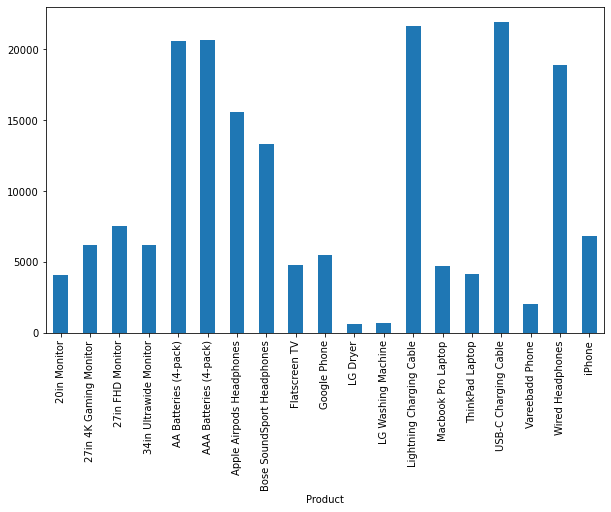

In [140]:
# checking it through visualisation

Quantity_of_sold_product.plot(kind= 'bar', figsize= (10, 6))
plt.show()

According to this, the most sold products are 'USB-C Charging Cable', 'Lightning Charging Cable', 'AAA Batteries (4-pack)', 'AA Batteries (4-pack)'

These products are most general purposed and come in resonable price. This could be the reason that these products are best sold.

### Finding some probablilty based on the results of 'Quantity_of_sold_product'

#### Probability(Event) = Favorable Outcomes/Total Outcomes = x/n

1 -> So How much probability for next people will ordered USB-C Charging Cable?

In [155]:
round(Quantity_of_sold_product['USB-C Charging Cable'] / Quantity_of_sold_product.sum(), 2)

# So the probability is 0.12

0.12

2 -> How much probability for next people will ordered iPhone?

In [156]:
round(Quantity_of_sold_product['iPhone'] / Quantity_of_sold_product.sum(), 2)

# so the probability is 0.04

0.04

3 -> How much probability for next people will ordered Google Phone?

In [158]:
round(Quantity_of_sold_product['Google Phone'] / Quantity_of_sold_product.sum(), 2)

# the probability is 0.03

0.03

4 -> How much probability other peoples will ordered Wired Headphones?

In [162]:
round(Quantity_of_sold_product['Wired Headphones'] / Quantity_of_sold_product.sum(), 2)

# the probability is 0.01

0.1